In [10]:
from pathlib import Path
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import durbin_watson

In [11]:
SIMPLIFIED_PLOTS = True
PLOT_SUMSAMPLE = 2000 # Used for heavy plots like scatter

In [12]:
df_raw = pd.read_csv("./data/Clean_Dataset.csv", index_col=0)
df_raw_sample = df_raw.sample(n=PLOT_SUMSAMPLE)
df_raw 

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Exploratory Data Analysis
- Top 5 Highest correlation predictors: class, duration, days_left, stops, airline
- duration class:Business: Log, heteroskedasticity 
- duration class:Economy: Linear, heteroskedasticity
- days_left class:economy: 1/x

In [13]:
# Create EDA report IF it doesn't exist
path_eda_report = Path("EDA/profiling_report.html")
path_eda_report.parent.mkdir(exist_ok=True)
if not path_eda_report.exists():
    profile = ProfileReport(df_raw, title="Profiling Report")
    profile.to_file(path_eda_report)

In [14]:
df_raw.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


<Axes: >

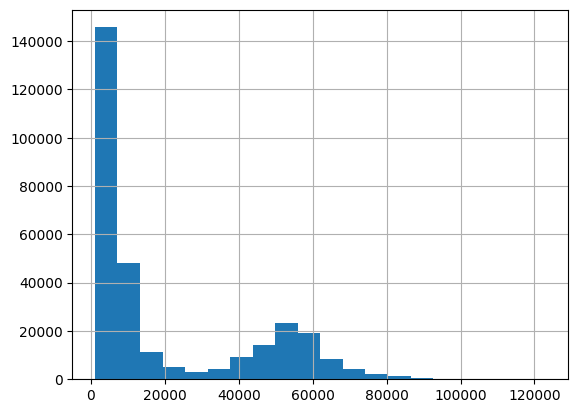

In [20]:
# px.histogram(df_raw, x="price")
df_raw.price.hist(bins=20)

In [16]:
if SIMPLIFIED_PLOTS:
    fig = px.scatter(df_raw_sample, x="days_left", y="price", color="class")
else: 
    fig = px.scatter(df_raw, x="days_left", y="price", color="class", marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")
fig.show()

In [17]:
if SIMPLIFIED_PLOTS:
    fig = px.scatter(df_raw_sample, x="duration", y="price", color="class")
else:
    fig = px.scatter(df_raw, x="duration", y="price", color="class", marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")
fig.show()

TODO:
- X Stats analysis
- X Auto Correlation 
- X Leverage for third dataset 
- residuals vs x 4th dataset